In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


### Read Data

In [59]:
# Load dataset
data = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")
data_fruit = pd.read_excel('fruit.xlsx')
data_fish = pd.read_csv('fish_data.csv')

In [60]:
data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [62]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [63]:
data.nunique()

Area                 2424
Perimeter            2490
Major_Axis_Length    2499
Minor_Axis_Length    2497
Convex_Area          2445
Equiv_Diameter       2424
Eccentricity         1295
Solidity              166
Extent               1392
Roundness            1480
Aspect_Ration        2237
Compactness          1405
Class                   2
dtype: int64

In [64]:
data[['Area', 'Perimeter', 'Solidity', 'Extent']].describe()

,Area,Perimeter,Solidity,Extent
count,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,0.989492,0.693205
std,13664.510228,109.256418,0.003494,0.060914
min,47939.000000,868.485000,0.918600,0.468000
25%,70765.000000,1048.829750,0.988300,0.658900
50%,79076.000000,1123.672000,0.990300,0.713050
75%,89757.500000,1203.340500,0.991500,0.740225
max,136574.000000,1559.450000,0.994400,0.829600


In [65]:
# Memisahkan fitur dan label
X = data.drop("Class", axis=1)  # 'target' adalah nama kolom label
y = data["Class"]

#xbu = data_fruit.drop(columns=['name'])
#ybu = data_fruit['name']

#xfi = data_fish.drop(columns=['species'])
#yfi = data_fish['species']

# Membagi dataset menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#x_train_bu, x_test_bu, y_train_bu, y_test_bu = train_test_split(xbu,ybu, test_size=0.2, random_state=42)

#x_train_fi, x_test_fi, y_train_fi, y_test_fi = train_test_split(xfi,yfi, test_size=0.2, random_state=42)


In [66]:
# Membuat model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
model.fit(X_train, y_train) # Latih dataset Pumpkin Seeds



RandomForestClassifier(random_state=42)

Accuracy: 86.8 %
Classification Report:
                precision    recall  f1-score   support

   Çerçevelik       0.87      0.87      0.87       251
Ürgüp Sivrisi       0.87      0.86      0.87       249

     accuracy                           0.87       500
    macro avg       0.87      0.87      0.87       500
 weighted avg       0.87      0.87      0.87       500



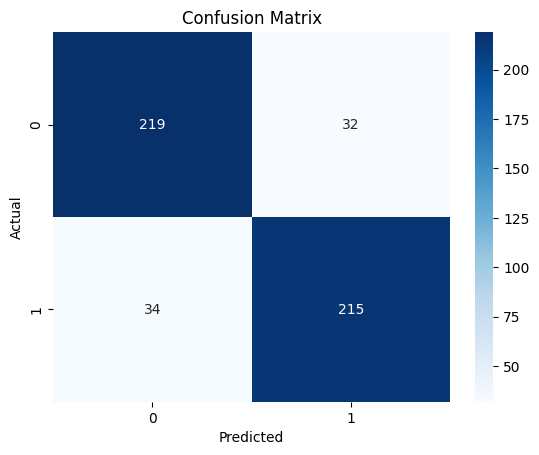

In [67]:
#Save Model Pickle
fw = open('pumpkin_forest.pkl' , 'wb')
md = pickle.dump(model , fw)

# Membuat prediksi
y_pred = model.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [73]:
# Save Model Dataset Fish dan Fruit
#model.fit(x_train_bu,y_train_bu) # Latih dataset Fruit
#fw = open('fruit_forest.pkl' , 'wb')
#md = pickle.dump(model , fw)

#model.fit(x_train_fi,y_train_fi) # Latih dataset Fish
#fw = open('fish_forest.pkl' , 'wb')
#md = pickle.dump(model , fw)

In [74]:
print("Akurasi Dataset Pumpkin Seeds:", accuracy*100,"%")

model.fit(x_train_bu,y_train_bu)
fw = open('fruit-forest.pkl' , 'wb')
md = pickle.dump(model , fw)
y_pred_bu = model.predict(x_test_bu)
akurasi_bu=accuracy_score(y_pred_bu,y_test_bu)
print(f"Akurasi Dataset Fruit :{akurasi_bu*100}%")

model.fit(x_train_fi,y_train_fi)
fw = open('fish-forest.pkl' , 'wb')
md = pickle.dump(model , fw)
y_pred_fi = model.predict(x_test_fi)
akurasi_fi=accuracy_score(y_pred_fi,y_test_fi)
print(f"Akurasi Dataset Fish :{akurasi_fi*100}%")

Akurasi Dataset Pumpkin Seeds: 86.8 %
Akurasi Dataset Fruit :95.15%
Akurasi Dataset Fish :93.62745098039215%


In [70]:
new_data={'Area': [68321, 83537],
          'Perimeter' : [1140.811, 1329.710],
          'Major_Axis_Length' : [781.082, 511.1513],
          'Minor_Axis_Length' : [381.774, 204.4367],
          'Convex_Area' : [77819, 84381],
          'Equiv_Diameter' : [517.926, 298.4289],
          'Eccentricity' : [0.630, 0.9840],
          'Solidity' : [0.9516, 0.9907],
          'Extent' : [0.9153, 0.5798],
          'Roundness' : [0.8416, 0.5972],
          'Aspect_Ration' : [3.7810, 2.5996],
          'Compactness' : [0.7612, 0.5973]}


new_data =pd.DataFrame(new_data)
new_data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,68321,1140.811,781.0820,381.7740,77819,517.9260,0.630,0.9516,0.9153,0.8416,3.7810,0.7612
1,83537,1329.710,511.1513,204.4367,84381,298.4289,0.984,0.9907,0.5798,0.5972,2.5996,0.5973


In [71]:
opf = open('pumpkin-forest.pkl' , 'rb')
model = pickle.load(opf)
y_pred_model = model.predict(new_data)

print("Hasil Prediksi dari model : ",y_pred_model)

Hasil Prediksi dari model :  ['Ürgüp Sivrisi' 'Ürgüp Sivrisi']
